# Analysis of canonizing MPS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from tebd.tebd import run_tebd

In [2]:
model_name = 'ising'

## Effect of $\lambda$

In [3]:
Ns = [3]

In [4]:
lmdas = np.linspace(0, 2, 20)

In [5]:
observables = ['energy']

In [6]:
energies_N_lmda = np.zeros((len(Ns), len(lmdas)))

with tqdm(total=len(Ns) * len(lmdas)) as pbar:
    for i in range(len(Ns)):
        for j in range(len(lmdas)):
            model_params = {"lmda": lmdas[j]}
            observables_at_midsteps = run_tebd(
                model_name, model_params, Ns[i], observables=observables, print_to_stdout=False, canonize=True
            )
            energies_N_lmda[i, j] = observables_at_midsteps["energy"][-1]
            pbar.update(1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]


In [7]:
energies_N_lmda_no_canonize = np.zeros((len(Ns), len(lmdas)))

with tqdm(total=len(Ns) * len(lmdas)) as pbar:
    for i in range(len(Ns)):
        for j in range(len(lmdas)):
            model_params = {"lmda": lmdas[j]}
            observables_at_midsteps = run_tebd(
                model_name, model_params, Ns[i], observables=observables, print_to_stdout=False
            )
            energies_N_lmda_no_canonize[i, j] = observables_at_midsteps["energy"][-1]
            pbar.update(1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.52it/s]


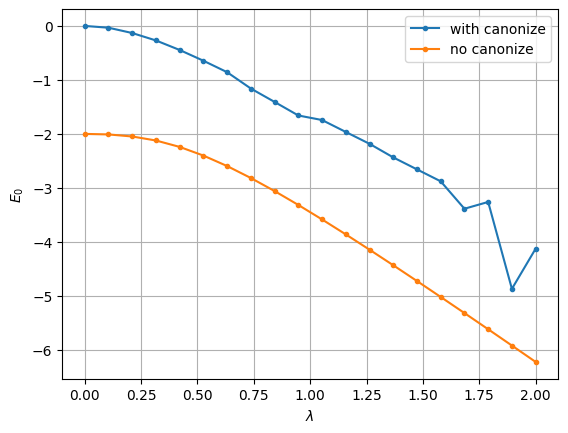

In [9]:
plt.plot(lmdas, energies_N_lmda[0], 'o-', markersize=3, label=f"with canonize")
plt.plot(lmdas, energies_N_lmda_no_canonize[0], 'o-', markersize=3, label=f"no canonize")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0$")
plt.legend()
plt.grid()